In [7]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter

In [2]:
# Population Statistics
def create_population(num_people, positive_fraction):
    
    assert positive_fraction <= 1 and positive_fraction >=0 
    return [1 if np.random.random() <= positive_fraction else 0 for i in range(num_people)]

In [56]:
def error(true, pred):
    return abs(true - pred)

In [50]:
def additive_noise(population, 
                   epsilon, 
                   delta, 
                   debug=False, 
                   p=None):
    
    n = len(population)
    if n < 100/(epsilon**2)*np.log(2/delta):
        if debug:
            print("Cannot guarantee privacy: n < {}".format(100/(epsilon**2)*np.log(2/delta)))
        return -1
    
    answer = []
    if not p:
        p = 1 - 50*np.log(2/delta)/(epsilon**2*n) # 
        
    if debug:
        print("p: {}".format(p))    
        
    for i in range(n):
        if np.random.random() <= p: 
            answer.append(population[i] + 1)
        else:
            answer.append(population[i])
            
    if debug:
        print("True: ", sum(population)/n,
              'Deviation from p: ', p - (sum(answer)/n - sum(population)/n))
        
#     if sum(answer)/n <= 1:
#         return 0
    
    return sum(answer)/n - p


In [43]:
# How does n scale with the privacy parameters


Text(0.5, 1.0, 'Number of users needed to guarantee privacy log10 scale')

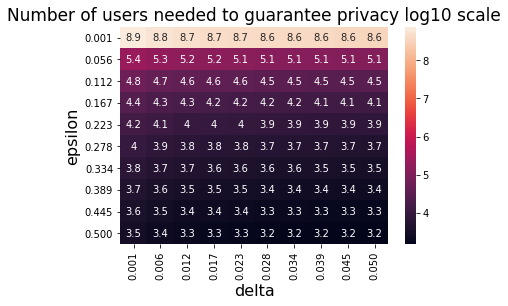

In [44]:
# How does p change with epsilon and delta: 
epsilons = np.linspace(0.001, 0.5, 10)
deltas = np.linspace(0.001, 0.05, 10)
X = np.zeros((len(epsilons), len(deltas)))
for i, ep in enumerate(epsilons):
    for j, delta in enumerate(deltas):        
        X[i,j] = 100/(ep**2)*np.log(2/delta)

n_dependence = pd.DataFrame(X, 
                            index=["{0:.3f}".format(i) for i in epsilons], 
                            columns=["{0:.3f}".format(i) for i in deltas]
                           )        
# Additive mechanisms need a lot of 
ax = sns.heatmap(np.log10(n_dependence), annot=True)
ax.set_ylabel('epsilon', fontsize=16)
ax.set_xlabel('delta', fontsize=16)
ax.set_title('Number of users needed to guarantee privacy log10 scale', fontsize=17)

In [6]:
# The error of the algorithm only depends on n; the bigger n is the better



In [66]:
epsilon = 0.3 # 
delta = 0.05 # Bad things happening

n = 10**4
true = 0.3
population = create_population(n, true)
EPOCHS = 20
ans = defaultdict(list)

ps = np.linspace(0.001, 0.5, 10)[::-1]
for i, p in enumerate(ps):
    sys.stdout.write("\r")
    sys.stdout.write("{}/{}".format(i+1, len(ps)))
    for epoch in range(EPOCHS):
        ans[p].append(additive_noise(population, ep, delta, debug=False, p=p))
    
for p in ans:
    ans[p] = np.mean(ans[p])
# additive_noise(population, epsilon, delta, debug=True)

abs(sum(population)/n - pd.Series(ans))

10/10

0.500000    0.000765
0.444556    0.000359
0.389111    0.001534
0.333667    0.000137
0.278222    0.000027
0.222778    0.001347
0.167333    0.000328
0.111889    0.000561
0.056444    0.000631
0.001000    0.000110
dtype: float64

30/30

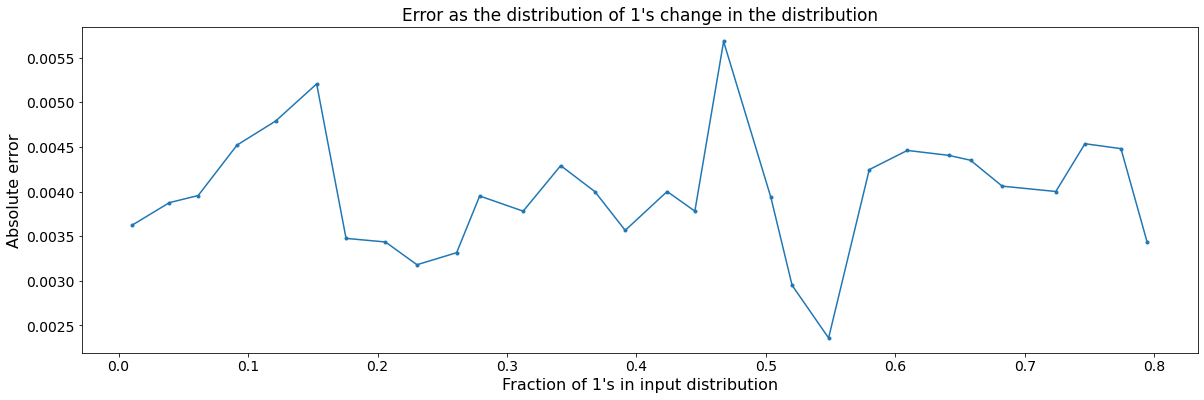

In [65]:
# Independence with distribution of 1's
epsilon = 0.3 # 
delta = 0.05 # Bad things happening
n = 10**4
p = 0.5
EPOCHS = 20
ans = defaultdict(list)

trues = np.linspace(0.01, 0.8, 30)
for i, _true in enumerate(trues):
    sys.stdout.write("\r")
    sys.stdout.write("{}/{}".format(i+1, len(trues)))
    population = create_population(n, _true)
    true = sum(population)/n
    for epoch in range(EPOCHS):
        pred = additive_noise(population, ep, delta, debug=False, p=p)
        ans[true].append(error(true, pred))

for x in ans:
    ans[x] = np.mean(ans[x])

ax = pd.Series(ans).plot(figsize=(20,6), fontsize=14, style='.-')
ax.set_ylabel('Absolute error', fontsize=16)
ax.set_xlabel("Fraction of 1's in input distribution", fontsize=16)
ax.set_title("Error as the distribution of 1's change in the distribution", fontsize=17);